In [2]:
    pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/Users/rishimane/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Class=0, n=115 (54.245%)
Class=3, n=25 (11.792%)
Class=1, n=38 (17.925%)
Class=2, n=25 (11.792%)
Class=4, n=9 (4.245%)


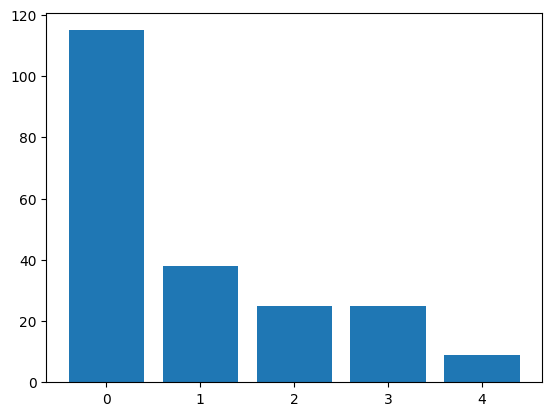

Before oversampling: Counter({0: 115, 1: 38, 3: 25, 2: 25, 4: 9})
After oversampling: Counter({0: 115, 3: 115, 1: 115, 2: 115, 4: 115})
SVM Accuracy: 0.5164835164835165
[[35  3  9  1  2]
 [ 3  4  7  2  0]
 [ 0  2  4  3  2]
 [ 0  2  4  4  0]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.80        50
           1       0.31      0.25      0.28        16
           2       0.17      0.36      0.23        11
           3       0.33      0.40      0.36        10
           4       0.00      0.00      0.00         4

    accuracy                           0.52        91
   macro avg       0.35      0.34      0.33        91
weighted avg       0.62      0.52      0.55        91

Epoch 1/20


/Users/rishimane/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rishimane/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


104/104 - 0s - 5ms/step - accuracy: 0.2070 - loss: 1.6952 - val_accuracy: 0.0000e+00 - val_loss: 2.2330
Epoch 2/20
104/104 - 0s - 654us/step - accuracy: 0.3404 - loss: 1.5621 - val_accuracy: 0.0000e+00 - val_loss: 1.9861
Epoch 3/20
104/104 - 0s - 658us/step - accuracy: 0.4468 - loss: 1.4213 - val_accuracy: 0.1034 - val_loss: 1.9029
Epoch 4/20
104/104 - 0s - 661us/step - accuracy: 0.4971 - loss: 1.3336 - val_accuracy: 0.1034 - val_loss: 2.1699
Epoch 5/20
104/104 - 0s - 694us/step - accuracy: 0.5242 - loss: 1.2891 - val_accuracy: 0.1034 - val_loss: 2.2069
Epoch 6/20
104/104 - 0s - 673us/step - accuracy: 0.5338 - loss: 1.2425 - val_accuracy: 0.2414 - val_loss: 1.4522
Epoch 7/20
104/104 - 0s - 674us/step - accuracy: 0.5571 - loss: 1.2254 - val_accuracy: 0.2241 - val_loss: 1.6622
Epoch 8/20
104/104 - 0s - 674us/step - accuracy: 0.5358 - loss: 1.2245 - val_accuracy: 0.1207 - val_loss: 1.9090
Epoch 9/20
104/104 - 0s - 681us/step - accuracy: 0.5648 - loss: 1.1889 - val_accuracy: 0.1207 - val_l

/Users/rishimane/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rishimane/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rishimane/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

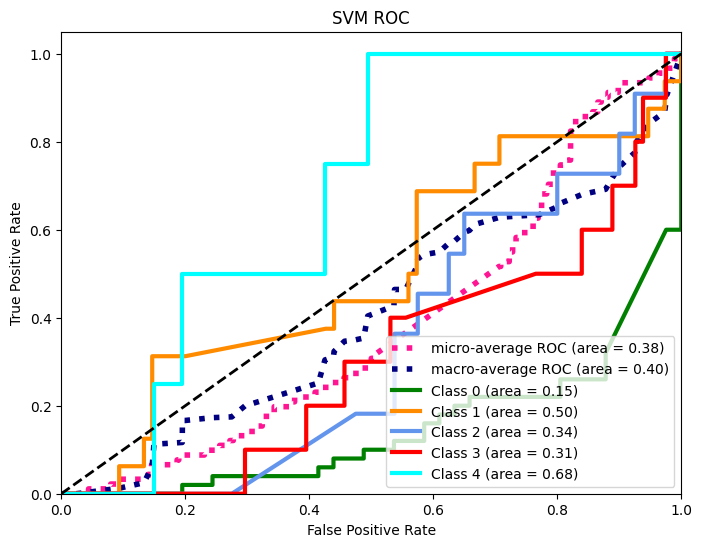

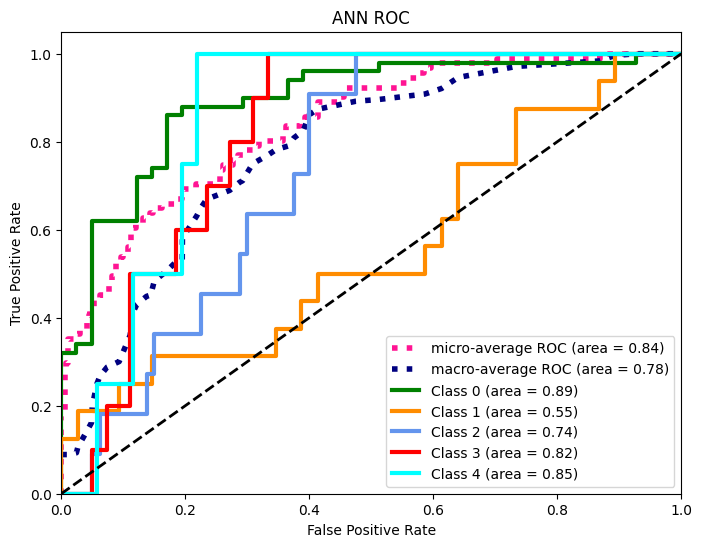

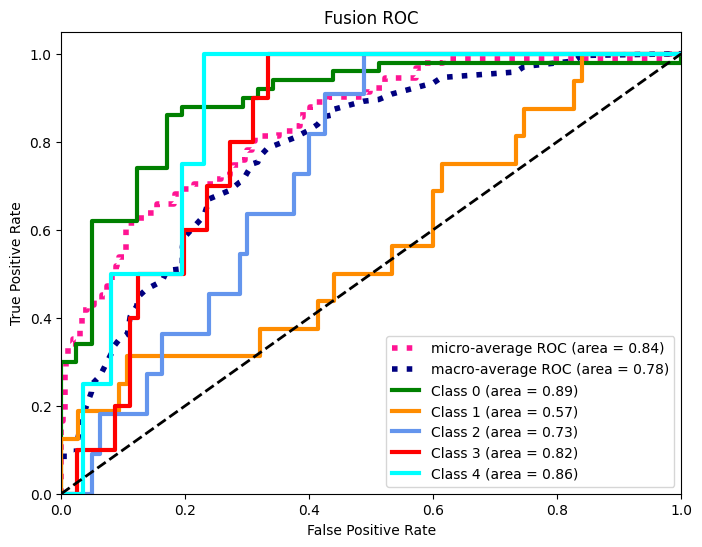

In [1]:
# Multi-Class Fusion Model-1 (ANN + SVM) using Weighted Score Fusion

import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

# --------------------------
# Load dataset
# --------------------------
data = pd.read_csv("./multiclassification.csv")
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

# --------------------------
# Train-Test Split (70:30)
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

# --------------------------
# Check Class Distribution
# --------------------------
counter = Counter(y_train)
for k, v in counter.items():
    per = v / len(y_train) * 100
    print(f'Class={k}, n={v} ({per:.3f}%)')
plt.bar(counter.keys(), counter.values())
plt.show()

# --------------------------
# Oversampling to balance classes
# --------------------------
os = RandomOverSampler()
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)
print(f"Before oversampling: {Counter(y_train)}")
print(f"After oversampling: {Counter(y_train_ns)}")

X_train, y_train = X_train_ns, y_train_ns

# --------------------------
# Standardization / Normalization
# --------------------------
sc = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))

# --------------------------
# SVM Model
# --------------------------
model_svm = SVC(probability=True, C=0.01)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model_svm.fit(X_train_scaled, y_train)
pred_svm = model_svm.predict(X_test_scaled)
pred_svm_prob = model_svm.predict_proba(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

# --------------------------
# ANN Model
# --------------------------
model_ann = Sequential()
model_ann.add(Dense(8, input_dim=13, activation='relu', use_bias=True, bias_initializer='zeros', kernel_regularizer=l2(0.01)))
model_ann.add(Dense(5, activation='softmax'))  # 5 classes

model_ann.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])

# Normalize data for ANN
X_train_ann = scaler.fit_transform(X_train)
X_test_ann = scaler.transform(X_test)

history = model_ann.fit(X_train_ann, y_train, validation_split=0.1, batch_size=5, epochs=20, shuffle=True, verbose=2)

pred_ann_prob = model_ann.predict(X_test_ann, batch_size=5, verbose=0)
pred_ann = np.argmax(pred_ann_prob, axis=1)

print("ANN Accuracy:", accuracy_score(y_test, pred_ann))
print(confusion_matrix(y_test, pred_ann))
print(classification_report(y_test, pred_ann))

# --------------------------
# Weighted Fusion (SVM + ANN)
# --------------------------
best_score = 0
best_p = 0
best_q = 0

for i in range(20):
    p = 1 - i * 0.05
    q = 1 - p
    mixed_prob = pred_svm_prob * p + pred_ann_prob * q
    mixed_pred = np.argmax(mixed_prob, axis=1)
    score = accuracy_score(y_test, mixed_pred)
    print(f"Fusion Accuracy | p={p:.2f}, q={q:.2f}: {score:.4f}")
    if score > best_score:
        best_score = score
        best_p = p
        best_q = q

# Final Fusion
p = best_p
q = best_q
mixed_prob = pred_svm_prob * p + pred_ann_prob * q
mixed_pred = np.argmax(mixed_prob, axis=1)

print("Final Fusion Accuracy:", accuracy_score(y_test, mixed_pred))
print(confusion_matrix(y_test, mixed_pred))
print(classification_report(y_test, mixed_pred))

# --------------------------
# Multi-class ROC / AUC
# --------------------------
n_classes = 5
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))
y_score_svm = pred_svm_prob
y_score_ann = pred_ann_prob
y_score_fusion = mixed_prob

def plot_multiclass_roc(y_test_bin, y_score, title="ROC Curve"):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure(figsize=(8,6))
    plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label=f'micro-average ROC (area = {roc_auc["micro"]:.2f})')
    plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4, label=f'macro-average ROC (area = {roc_auc["macro"]:.2f})')

    colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=3, label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves
plot_multiclass_roc(y_test_bin, y_score_svm, title="SVM ROC")
plot_multiclass_roc(y_test_bin, y_score_ann, title="ANN ROC")
plot_multiclass_roc(y_test_bin, y_score_fusion, title="Fusion ROC")
